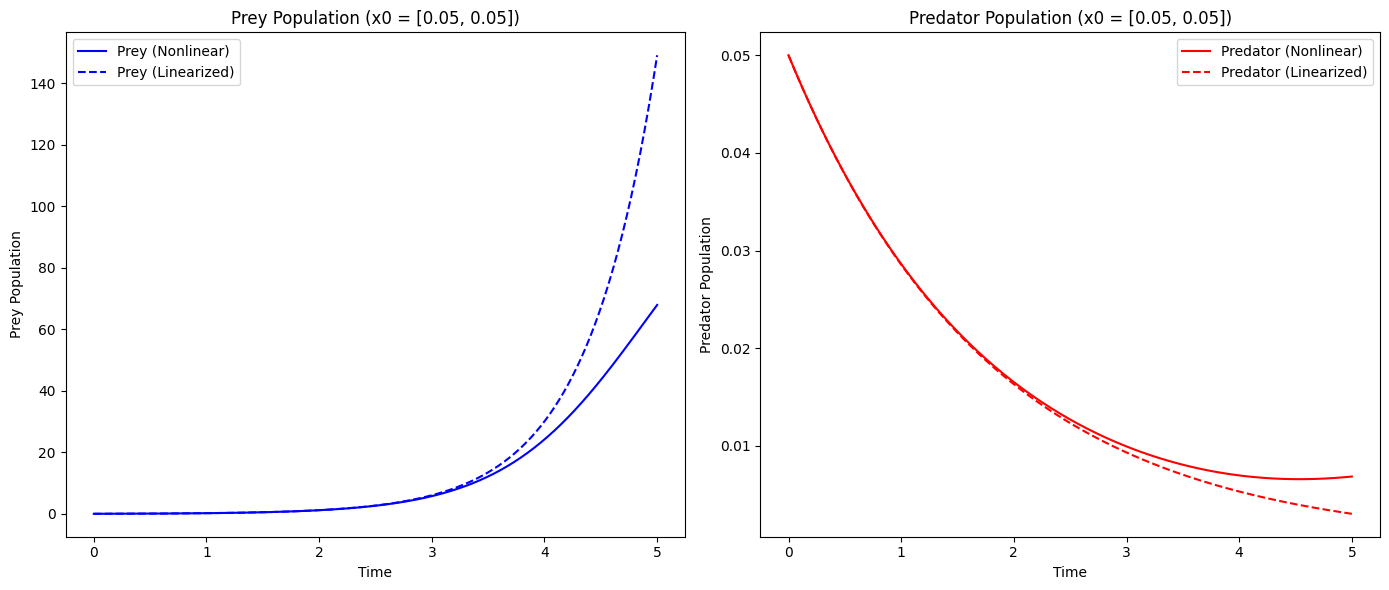

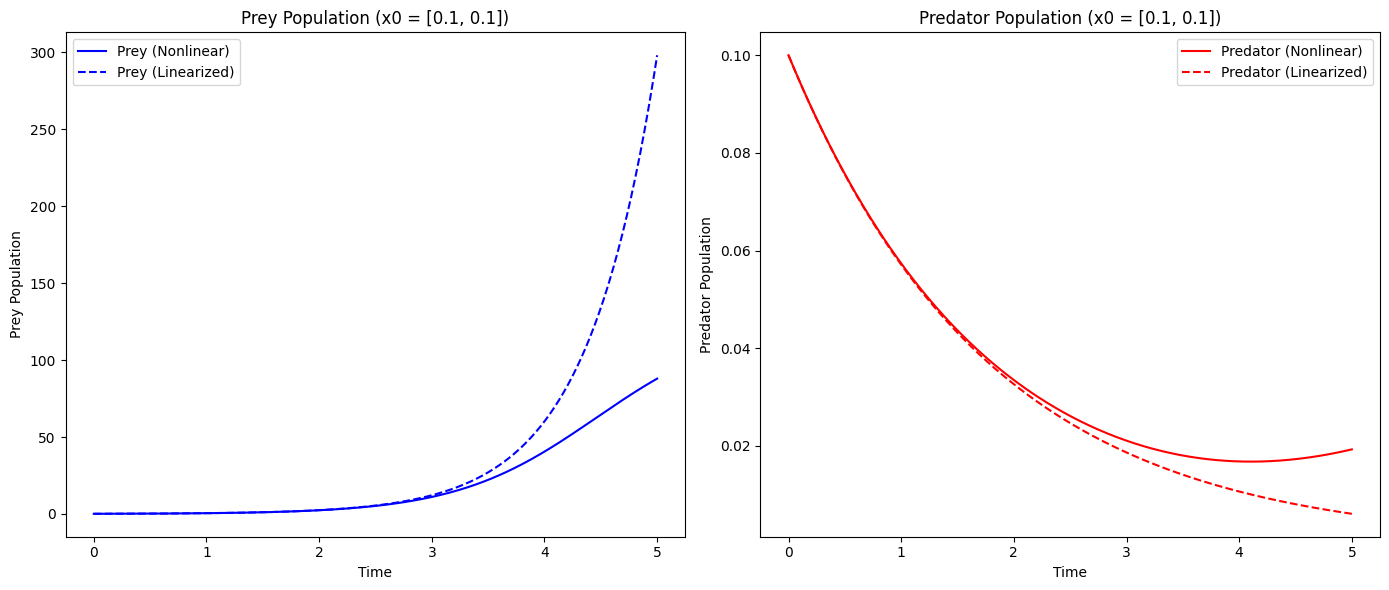

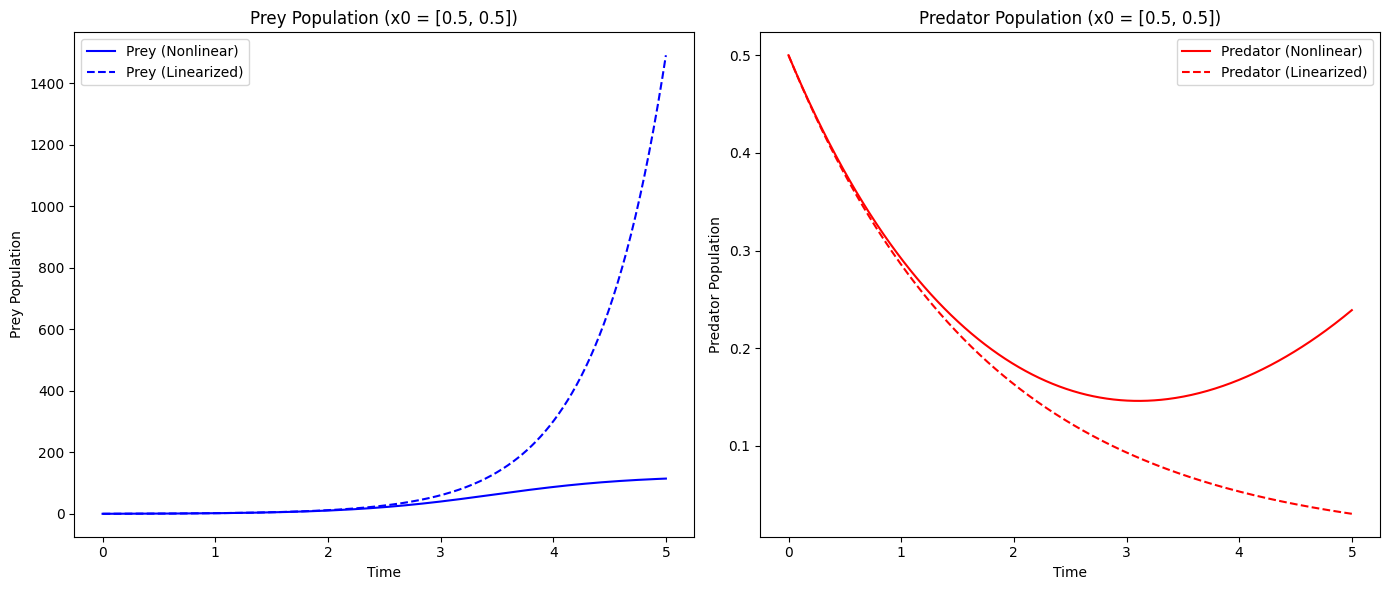

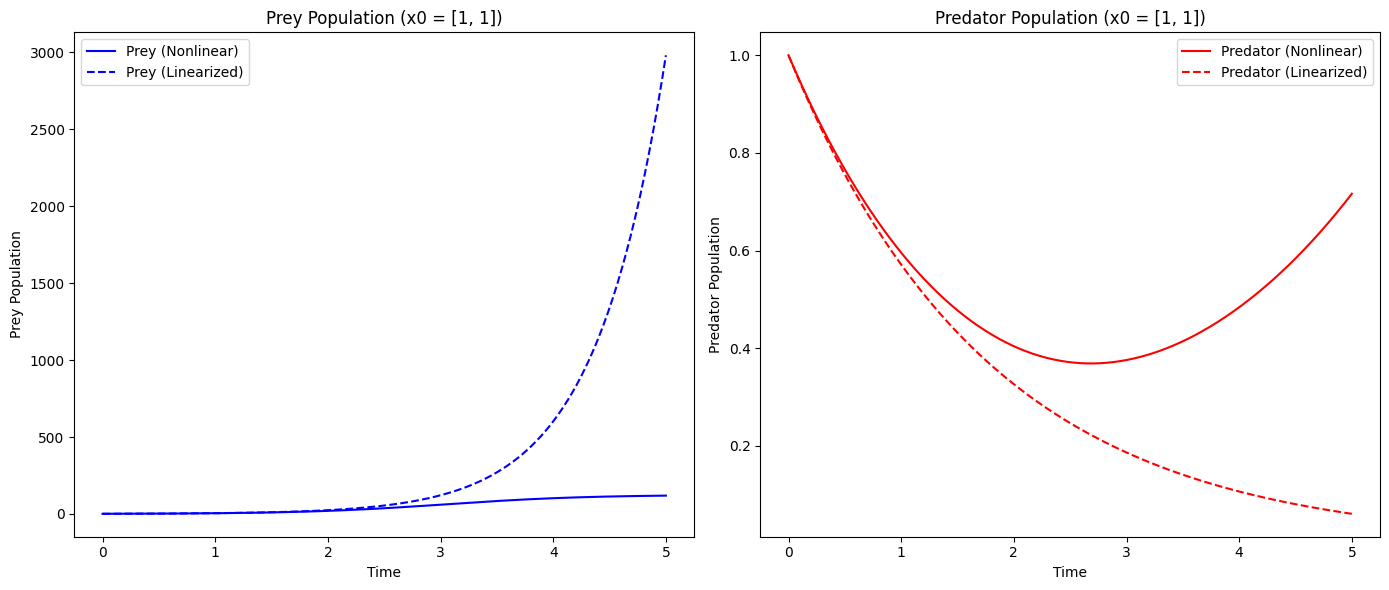

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
a = 3.0
b = 0.6
c = 100
d = 0.56
k = 125
r = 1.6

# Define the full nonlinear system (predator-prey dynamics)
def predator_prey_system(t, X):
    x1, x2 = X
    dx1dt = r * x1 * (1 - x1 / k) - (a * x1 * x2) / (c + x1)
    dx2dt = b * (a * x1 * x2) / (c + x1) - d * x2
    return [dx1dt, dx2dt]

# Linearized system around (0, 0)
def linearized_00_system(t, X):
    J_00 = np.array([[r, 0], [0, -d]])  # Jacobian at (0, 0)
    return J_00 @ X

# Solve the systems (nonlinear and linearized)
def solve_systems(X0, t_max, t_eval):
    # Nonlinear system
    sol_nonlinear = solve_ivp(predator_prey_system, [0, t_max], X0, t_eval=t_eval, rtol=1e-8)

    # Linearized system around (0, 0)
    sol_linear_00 = solve_ivp(linearized_00_system, [0, t_max], X0, t_eval=t_eval, rtol=1e-8)

    return sol_nonlinear.t, sol_nonlinear.y, sol_linear_00.y

# Time vector and initial conditions
t_max = 5
t_eval = np.linspace(0, t_max, 500)
initial_conditions = [[0.05, 0.05], [0.1, 0.1], [0.5, 0.5], [1, 1]]  # Different initial conditions near (0,0)

# Plotting one figure for each initial condition
for i, X0 in enumerate(initial_conditions):
    t, sol_nonlinear, sol_linear_00 = solve_systems(X0, t_max, t_eval)

    # Create a new figure for each initial condition
    plt.figure(figsize=(14, 6))

    # Plot prey population (x1)
    plt.subplot(1, 2, 1)
    plt.plot(t, sol_nonlinear[0], label=f'Prey (Nonlinear)', color='b')
    plt.plot(t, sol_linear_00[0], '--', label=f'Prey (Linearized)', color='b')
    plt.title(f'Prey Population (x0 = {X0})')
    plt.xlabel('Time')
    plt.ylabel('Prey Population')
    plt.legend()

    # Plot predator population (x2)
    plt.subplot(1, 2, 2)
    plt.plot(t, sol_nonlinear[1], label=f'Predator (Nonlinear)', color='r')
    plt.plot(t, sol_linear_00[1], '--', label=f'Predator (Linearized)', color='r')
    plt.title(f'Predator Population (x0 = {X0})')
    plt.xlabel('Time')
    plt.ylabel('Predator Population')
    plt.legend()

    plt.tight_layout()
    plt.show()


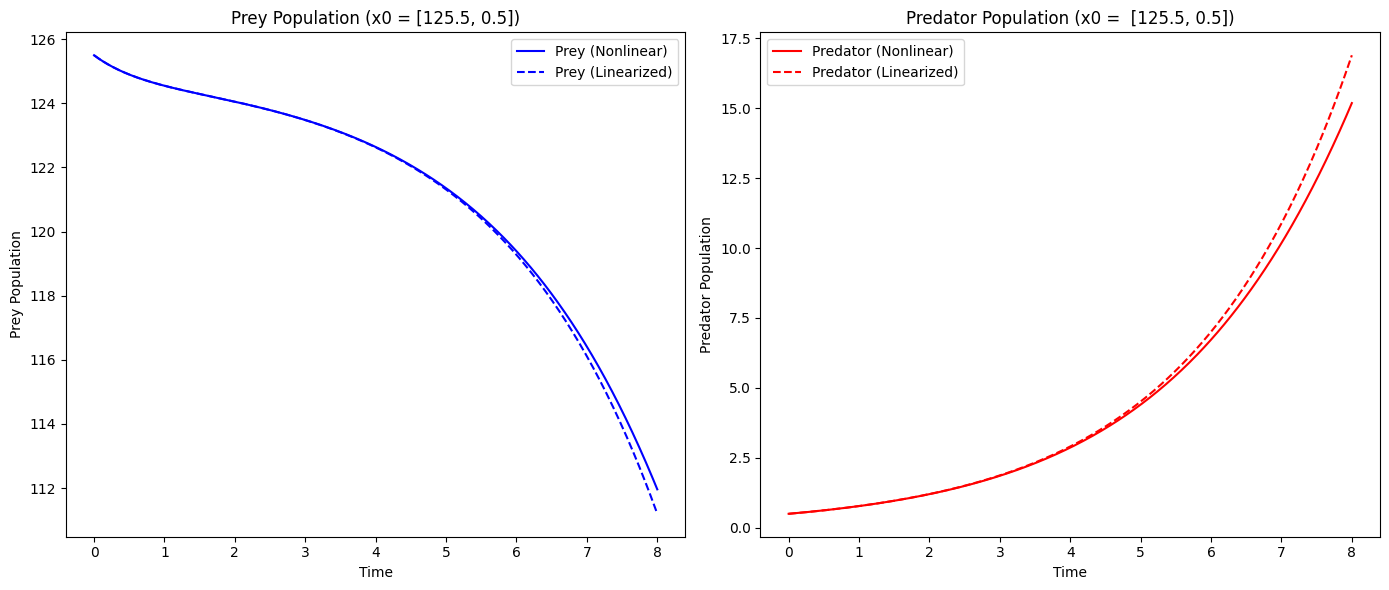

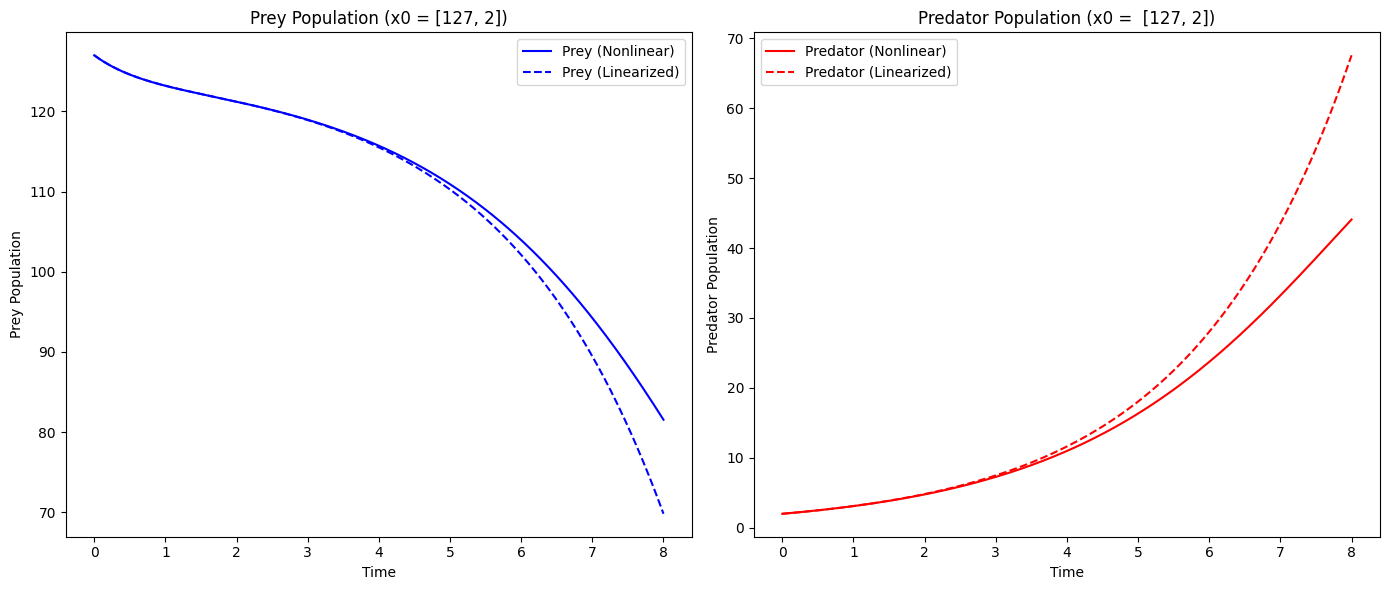

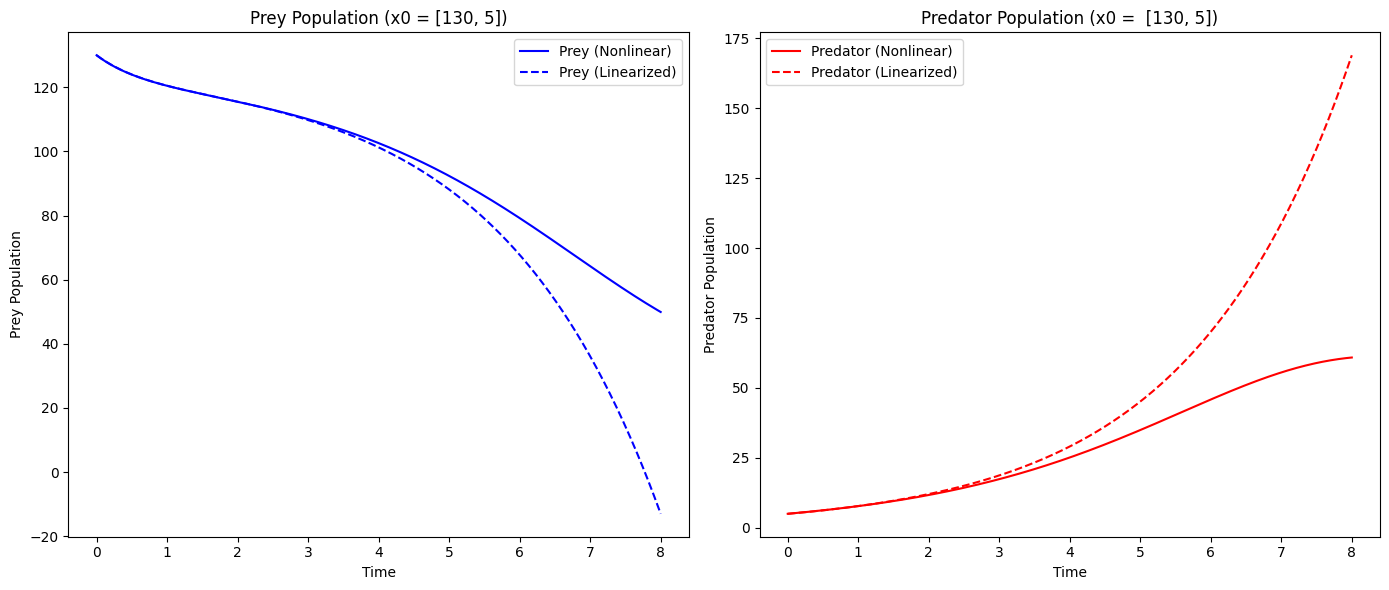

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
a = 3.0
b = 0.6
c = 100
d = 0.56
k = 125
r = 1.6

# Define the full nonlinear system (predator-prey dynamics)
def predator_prey_system(t, X):
    x1, x2 = X
    dx1dt = r * x1 * (1 - x1 / k) - (a * x1 * x2) / (c + x1)
    dx2dt = b * (a * x1 * x2) / (c + x1) - d * x2
    return [dx1dt, dx2dt]

# Linearized system around (k, 0)
def linearized_k0_system(t, X):
    J_k0 = np.array([[-r, -a * k / (c + k)], [0, b * a * k / (c + k) - d]])  # Jacobian at (k, 0)
    return J_k0 @ X

# Solve the systems (nonlinear and linearized)
def solve_systems(X0, t_max, t_eval):
    # Nonlinear system
    sol_nonlinear = solve_ivp(predator_prey_system, [0, t_max], X0, t_eval=t_eval, rtol=1e-8)

    # Linearized system around (k, 0)
    X0_lin_k0 = [X0[0] - k, X0[1]]  # Shift initial conditions to (k, 0)
    sol_linear_k0 = solve_ivp(linearized_k0_system, [0, t_max], X0_lin_k0, t_eval=t_eval, rtol=1e-8)

    return sol_nonlinear.t, sol_nonlinear.y, sol_linear_k0.y

# Time vector and initial conditions
t_max = 8
t_eval = np.linspace(0, t_max, 500)
initial_conditions = [[125.5, 0.5], [127, 2], [130, 5]]  # Different initial conditions near (k,0)

# Plotting one figure for each initial condition
for i, X0 in enumerate(initial_conditions):
    t, sol_nonlinear, sol_linear_k0 = solve_systems(X0, t_max, t_eval)

    # Create a new figure for each initial condition
    plt.figure(figsize=(14, 6))

    # Plot prey population (x1)
    plt.subplot(1, 2, 1)
    plt.plot(t, sol_nonlinear[0], label=f'Prey (Nonlinear)', color='b')
    plt.plot(t, sol_linear_k0[0] + k, '--', label=f'Prey (Linearized)', color='b')
    plt.title(f'Prey Population (x0 = {X0})')
    plt.xlabel('Time')
    plt.ylabel('Prey Population')
    plt.legend()

    # Plot predator population (x2)
    plt.subplot(1, 2, 2)
    plt.plot(t, sol_nonlinear[1], label=f'Predator (Nonlinear)', color='r')
    plt.plot(t, sol_linear_k0[1], '--', label=f'Predator (Linearized)', color='r')
    plt.title(f'Predator Population (x0 =  {X0})')
    plt.xlabel('Time')
    plt.ylabel('Predator Population')
    plt.legend()

    plt.tight_layout()
    plt.show()

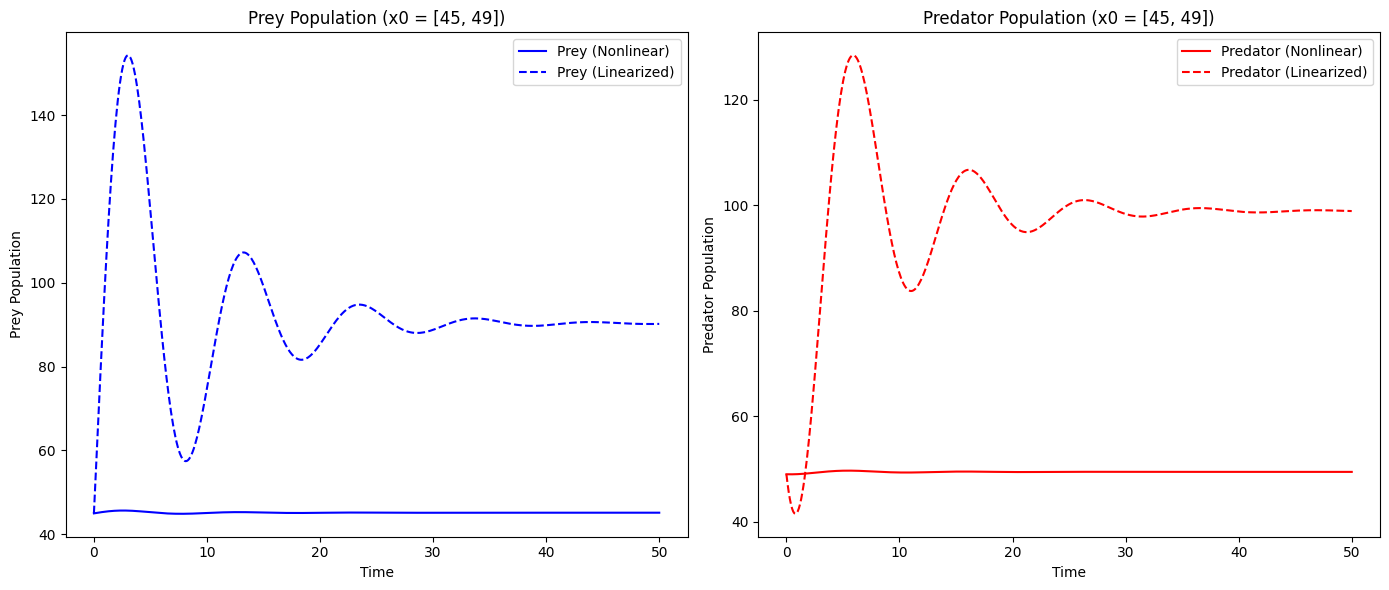

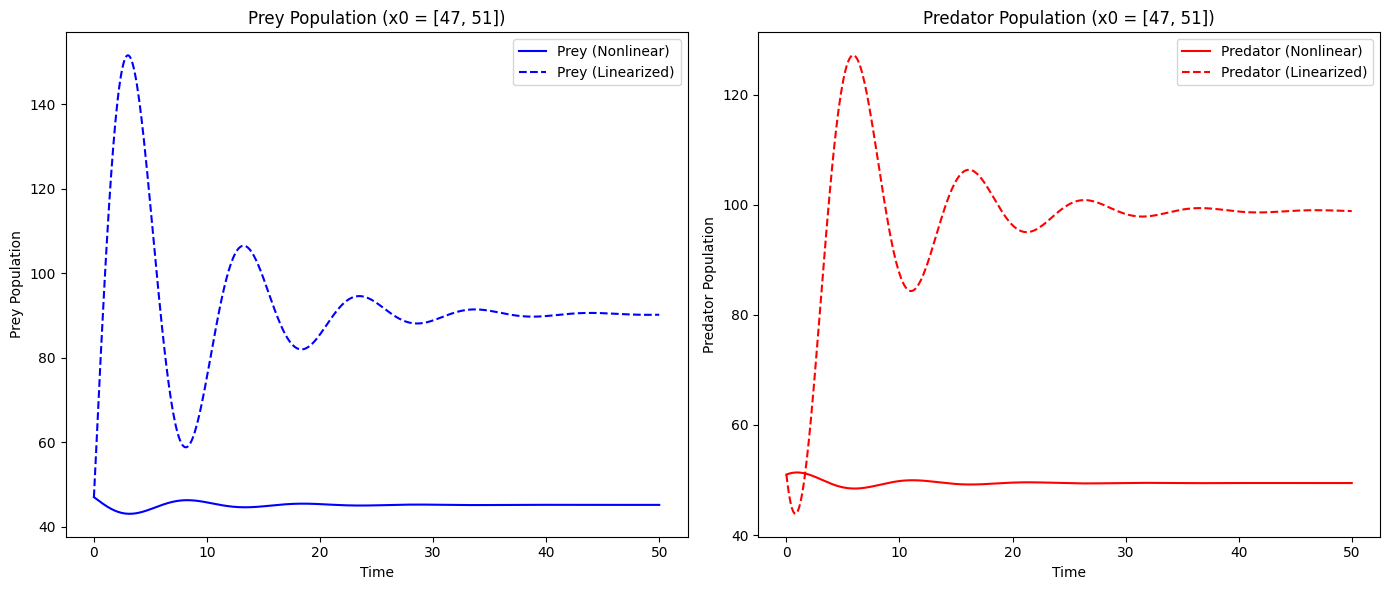

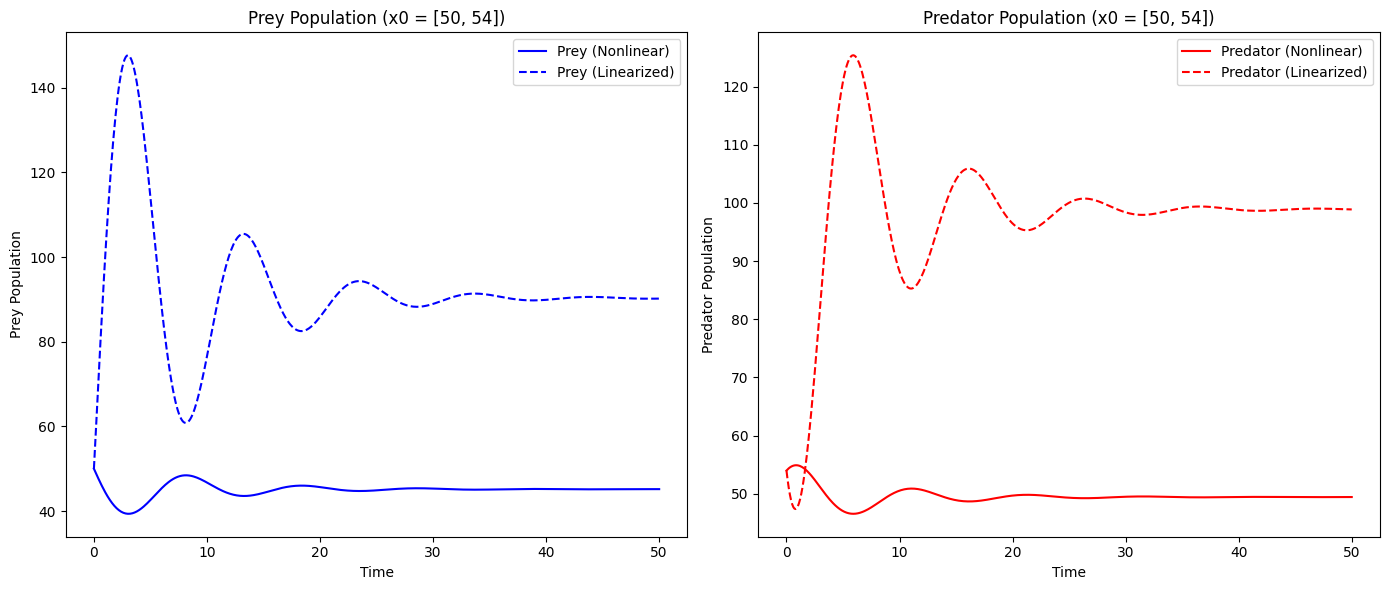

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
a = 3.0
b = 0.6
c = 100
d = 0.56
k = 125
r = 1.6

# Calculate the third equilibrium point (x_1*, x_2*)
x1_star = d * c / (b * a - d)  # Prey population at third equilibrium
x2_star = r * (1 - x1_star / k) * (c + x1_star) / a  # Predator population at third equilibrium

# Define the full nonlinear system (predator-prey dynamics)
def predator_prey_system(t, X):
    x1, x2 = X
    dx1dt = r * x1 * (1 - x1 / k) - (a * x1 * x2) / (c + x1)
    dx2dt = b * (a * x1 * x2) / (c + x1) - d * x2
    return [dx1dt, dx2dt]

# Linearized system around (x1_star, x2_star)
def linearized_x1x2_star_system(t, X):
    x1, x2 = X
    # Compute Jacobian at the equilibrium point (x1_star, x2_star)
    J = np.array([
        [r * (1 - 2 * x1_star / k) - ((a * x2_star * c) / (c + x1_star)**2), - (a * x1_star) / (c + x1_star)],
        [(b * a * x2_star * c) / (c + x1_star)**2, b * a * x1_star / (c + x1_star) - d]
    ])
    # Compute the change dx/dt = J @ X
    return J @ np.array([x1 - x1_star, x2 - x2_star])

# Solve the systems (nonlinear and linearized)
def solve_systems(X0, t_max, t_eval):
    # Nonlinear system
    sol_nonlinear = solve_ivp(predator_prey_system, [0, t_max], X0, t_eval=t_eval, rtol=1e-8)

    # Linearized system around (x1_star, x2_star)
    X0_lin = [X0[0] - x1_star, X0[1] - x2_star]  # Initial conditions shifted to (x1_star, x2_star)
    sol_linear = solve_ivp(linearized_x1x2_star_system, [0, t_max], X0_lin, t_eval=t_eval, rtol=1e-8)

    return sol_nonlinear.t, sol_nonlinear.y, sol_linear.y

# Time vector and initial conditions near (x1_star, x2_star)
t_max = 50
t_eval = np.linspace(0, t_max, 500)
#initial_conditions = [[x1_star + 10, x2_star + 5], [x1_star - 5, x2_star - 2], [x1_star + 15, x2_star + 10]]
initial_conditions = [[45,  49], [ 47, 51], [50, 54]]
#initial_conditions = [[20.4,  29.4]]

# Plotting one figure for each initial condition
for i, X0 in enumerate(initial_conditions):
    t, sol_nonlinear, sol_linear = solve_systems(X0, t_max, t_eval)

    # Create a new figure for each initial condition
    plt.figure(figsize=(14, 6))

    # Plot prey population (x1)
    plt.subplot(1, 2, 1)
    plt.plot(t, sol_nonlinear[0], label=f'Prey (Nonlinear)', color='b')
    plt.plot(t, sol_linear[0] + x1_star, '--', label=f'Prey (Linearized)', color='b')
    plt.title(f'Prey Population (x0 = {X0})')
    plt.xlabel('Time')
    plt.ylabel('Prey Population')
    plt.legend()

    # Plot predator population (x2)
    plt.subplot(1, 2, 2)
    plt.plot(t, sol_nonlinear[1], label=f'Predator (Nonlinear)', color='r')
    plt.plot(t, sol_linear[1] + x2_star, '--', label=f'Predator (Linearized)', color='r')
    plt.title(f'Predator Population (x0 = {X0})')
    plt.xlabel('Time')
    plt.ylabel('Predator Population')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
print(x1_star)
print(x2_star)

Jaco = np.array([
        [r * (1 - 2 * x1_star / k) - ((a * x2_star * c) / (c + x1_star)**2), - (a * x1_star) / (c + x1_star)],
        [(b * a * x2_star * c) / (c + x1_star)**2, b * a * x1_star / (c + x1_star) - d]
    ])

print(np.linalg.eig(Jaco))

45.16129032258066
49.44849115504683
EigResult(eigenvalues=array([-0.13006452+0.61426641j, -0.13006452-0.61426641j]), eigenvectors=array([[ 0.82971941+0.j        ,  0.82971941-0.j        ],
       [-0.11562541-0.54607368j, -0.11562541+0.54607368j]]))
